### The Culture of International Relations

#### About this project
Cultural treaties are the bi-lateral and multilateral agreements among states that promote and regulate cooperation and exchange in the fields of life generally call cultural or intellectual. Although it was only invented in the early twentieth century, this treaty type came to be the fourth most common bilateral treaty in the period 1900-1980 (Poast et al., 2010). In this project, we seek to use several (mostly European) states’ cultural treaties as a historical source with which to explore the emergence of a global concept of culture in the twentieth century. Specifically, the project will investigate the hypothesis that the culture concept, in contrast to earlier ideas of civilization, played a key role in the consolidation of the post-World War II international order.

The central questions that interest me here can be divided into two groups: 
- First, what is the story of the cultural treaty, as a specific tool of international relations, in the twentieth century? What was the historical curve of cultural treaty-making? For example, in which political or ideological constellations do we find (the most) use of cultural treaties? Among which countries, in which historical periods? What networks of relations were thereby created, reinforced, or challenged? 
- Second, what is the "culture" addressed in these treaties? That is, what do the two signatories seem to mean by "culture" in these documents, and what does that tell us about the role that concept played in the international system? How can quantitative work on this dataset advance research questions about the history of concepts?

In this notebook, we deal with these treaties in three ways:
1) quantitative analysis of "metadata" about all bilateral cultural treaties signed betweeen 1919 and 1972, as found in the World Treaty Index or WTI (Poast et al., 2010).
    For more on how exactly we define a "cultural treaty" here, and on other principles of selection, see... [add this, using text now in "WTI quality assurance"].
2) network analysis of the system of international relationships created by these treaties (using data from WTI, as above).
3) Text analysis of the complete texts of selected treaties. 

After some set-up sections, the discussion of the material begins at "Part 1," below.

### <span style='color:blue'>**Mandatory Prepare Step**</span>: Setup Notebook and Load and Process Treaty Master Index
The following code cell to be executed once for each user session.

In [3]:
# Code Cell Setup
%load_ext autoreload
%autoreload 2

import os
import warnings

os.sys.path = os.sys.path + [ x for x in ['.', '1_quantitative_analysis', '2_network_analysis' ] if x not in os.sys.path ]

warnings.filterwarnings('ignore')

import common.treaty_state as treaty_state

%matplotlib inline

wti_index = treaty_state.load_wti_index('./data')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2018-10-25 12:50:57,766 : INFO : Data loaded!


### Example: Inline TQ By Parties Chart


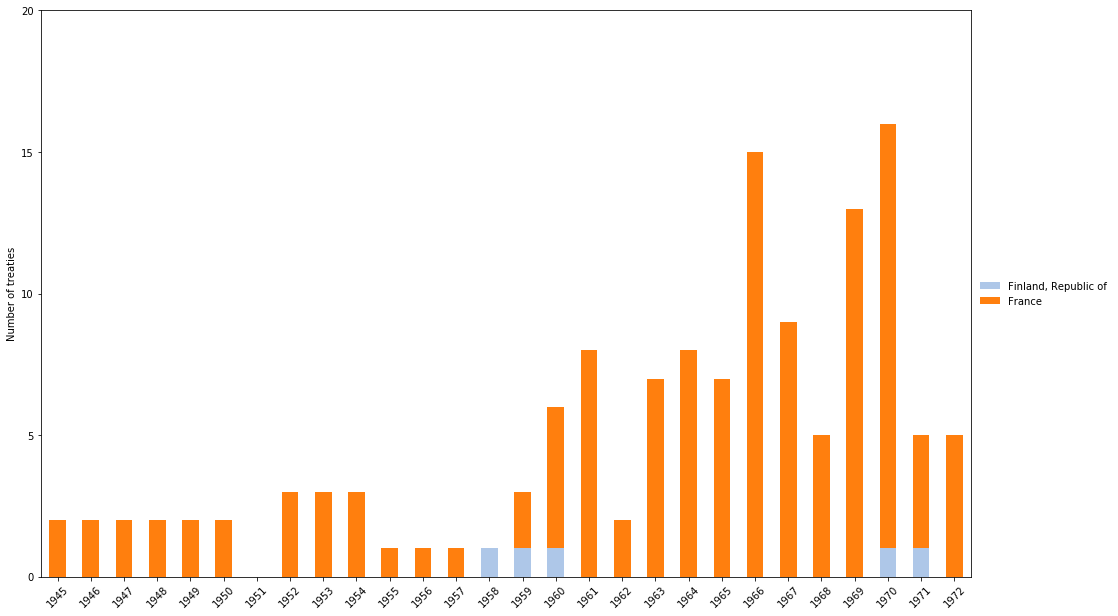

In [4]:
import party_analysis_gui
args = {
    'parties': ('FINLAN', 'FRANCE'),            # Parties to include
    'treaty_filter': 'is_cultural',             # Treaty filter (see config.TREATY_FILTER_OPTIONS)
    'party_name': 'party_name',                 # Party name to use (see config.PARTY_NAME_OPTIONS)
    'top_n_parties': 0,                         # Used? Filter on top parties per category
    'extra_category': '',                       # Add 'ALL' or 'ALL_OTHER' category
    'plot_style': 'seaborn-pastel',             # Matplotlib plot style (see MATPLOTLIB_PLOT_STYLES for valid values)
    'wti_index': wti_index,                     # WTI index to use, assigned in SETUP CELL above
    'period_group_index': 3,                    # Period item index in config.DEFAULT_PERIOD_GROUPS (first item has index 0)
    'normalize_values': False,                  # Normalize each values in each category to 100%
    'overlay': True,                            # Used? Display one chart per category
    'chart_type_name': 'plot_stacked_bar',      # Kind of charts (see config.CHART_TYPES, attribute name for valid keys)
    'year_limit': (1945, 1972)                  # Signed year filter
}

party_analysis_gui.display_quantity_by_party(**args)

### Example: Inline TQ By Topics Chart

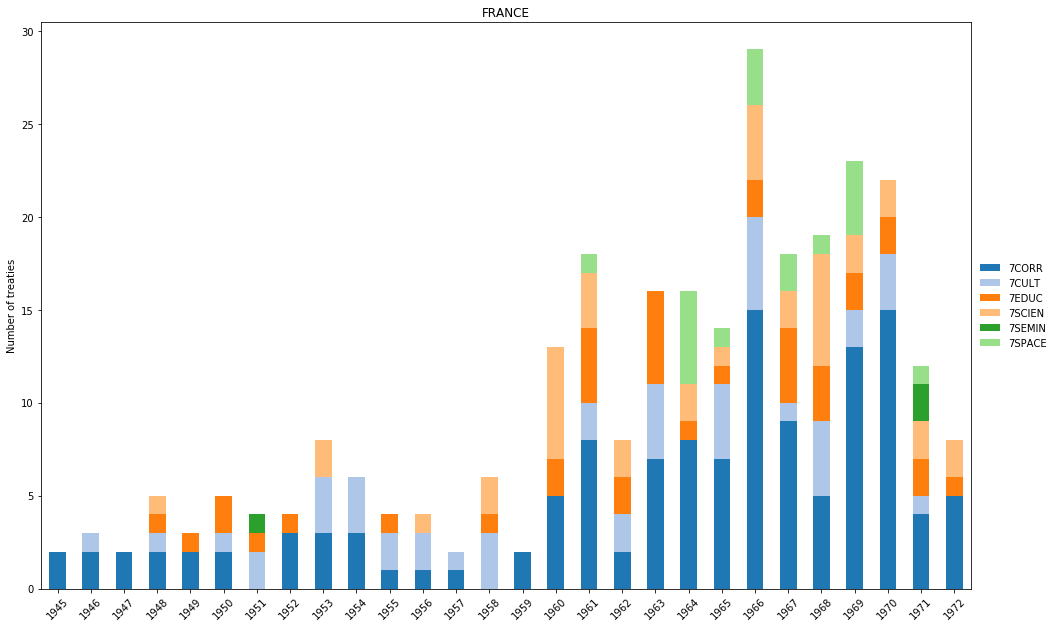

In [5]:
import topic_analysis_gui

args = {
    'chart_per_category': False,                # Overlay charts
    'chart_type_name': 'plot_stacked_bar',      # Kind of charts (see config.CHART_TYPES, attribute name for valid keys)
    'extra_other_category': False,              # Add 'ALL' or 'ALL_OTHER' category
    'normalize_values': False,                  # Normalize each values in each category to 100%
    'parties': ('FRANCE',),                     # Parties to include
    'period_group_index': 3,                    # Period group item index in config.DEFAULT_PERIOD_GROUPS (first item has index 0)
    'plot_style': 'seaborn-pastel',             # Matplotlib plot style (see MATPLOTLIB_PLOT_STYLES for valid values)
    'recode_is_cultural': True,                 # Flag: recode is_cultural='Yes' to topic '7CORR'
    'target_quantity': 'topic',                 # Target entity type: 'topic' or 'party'
    'topic_group_name': '7CULTURE',             # Topic group name (see config.DEFAULT_TOPIC_GROUPS)
    'wti_index': wti_index                      # WTI index to use, assigned in SETUP CELL above
}
topic_analysis_gui.display_topic_quantity_groups(**args)

### Example: Inline Title Analysis Chart

2018-10-25 12:51:17,870 : INFO : Please wait, preparing headnote corpus...
2018-10-25 12:51:37,893 : INFO : Done!


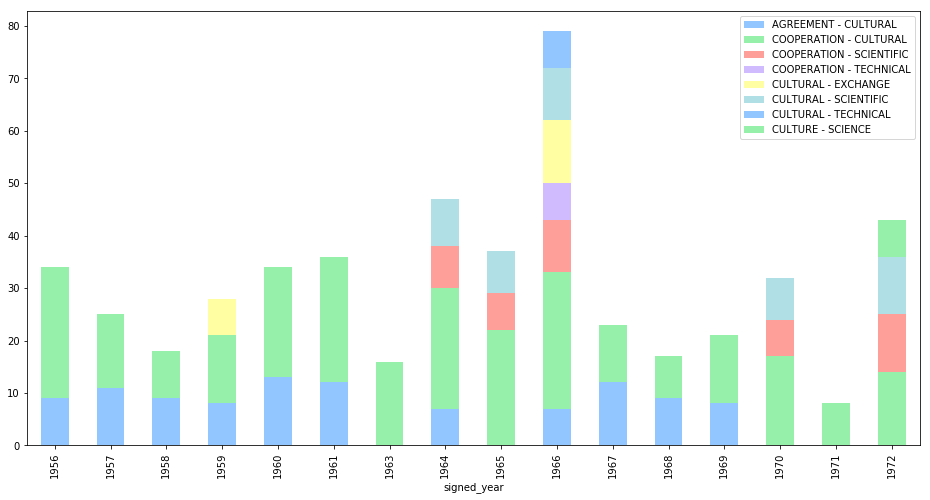

In [6]:
import headnode_gui
import headnote_corpus

if wti_index.__dict__.get('headnote_corpus', None) is None:
    wti_index.headnote_corpus = headnote_corpus.HeadnoteTokenCorpus(treaties=wti_index.treaties)
    
args = {
    'compute_co_occurance': True,               # Flag: Compute co-occurrence if True, else word statistics
    'extra_groupbys': None,                     # Not implemented
    'min_word_size': 2,                         # Min word character length to consider
    'n_min_count': 7,                           # Min threshold for item count (words, word pairs) per category
    'n_top': 25,                                # Max displayed items per category
    'output_format': 'plot_stacked_bar',        # Kind of charts (see headnote_gui.OUTPUT_OPTIONS, attribute name for valid keys)
    'parties': ('ALL',),                        # Parties to include
    'period_group_index': 3,                    # Period group item index in config.DEFAULT_PERIOD_GROUPS (first item has index 0)
    'recode_is_cultural': False,                # Flag: recode is_cultural='Yes' to topic '7CORR'
    'remove_stopwords': True,                   # Flag: remove stopwords
    'topic_group_name': '7CORR',                # Topic group name (see config.DEFAULT_TOPIC_GROUPS)
    'treaty_filter': 'is_cultural',             # Treaty filter (see config.TREATY_FILTER_OPTIONS)
    'use_lemma': False,                         # Flag: lemmatize words
    'wti_index': wti_index                      # WTI index to use, assigned in SETUP CELL above
}
headnode_gui.display_headnote_toplist(**args)

In [33]:
import common.utility as utility
import network_analysis_gui
from bokeh.plotting import output_notebook

output_notebook()
    
args = {
    'C': 1,
    'K': 0.1,
    'height': 700,
    'layout_algorithm': 'nx_spring_layout',
    'node_partition': None,
    'node_size': None,
    'node_size_range': (20, 49),
    'output': 'network',
    'p1': 1.1,
    'palette_name': None,
    'parties': ('FRANCE', 'ITALY', 'UK', 'GERM'),
    'party_name': 'party_name',
    'period_group_index': 3,
    'plot_data': None,
    'recode_is_cultural': True,
    'topic_group': {'7CORR': '7CORR'},
    'treaty_filter': 'is_cultural',
    'year_limit': (1945, 1972),
    'width': 900,
    'wti_index': wti_index
}

network_analysis_gui.display_party_network(**args)

Loading BokehJS ...

(1945, 1972)
